# Spam Mail Prediction 

  The problem statement for this project is to predict whether a mail is a spam mail or an ham mail.


 **Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load the dataset to pandas Data Frame
raw_mail_data = pd.read_csv('spamham.csv')

# replace the null values with a null string other will show error
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)), '')

In [4]:
# Shape of the data
mail_data.shape

(5572, 2)

In [5]:
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Data Preprocessing**

In [6]:
#checking for null values
mail_data.isnull().sum()

Category    0
Message     0
dtype: int64

In [7]:
mail_data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
# label spam mail as 0; Non-spam mail (ham) mail as 1.

mail_data.loc[mail_data['Category'] == 'spam', 'Category',] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category',] = 1

In [9]:
mail_data['Category'].value_counts()

1    4825
0     747
Name: Category, dtype: int64

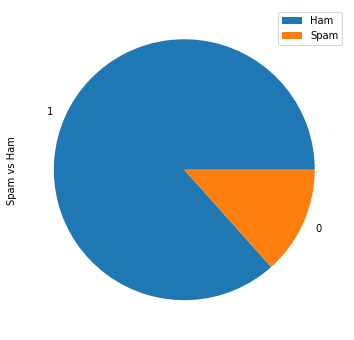

In [10]:
mail_data['Category'].value_counts().plot(kind = 'pie', figsize = (6,6))
plt.ylabel("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

In [11]:
# separate the data as text and label. X --> text; Y --> label

X = mail_data['Message']
Y = mail_data['Category']

In [12]:
print(X.value_counts())
print('.............')
print(Y.value_counts())

Sorry, I'll call later                                                                                                                                                 30
I cant pick the phone right now. Pls send a message                                                                                                                    12
Ok...                                                                                                                                                                  10
Ok                                                                                                                                                                      4
Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...     4
                                                                                                                                                      

In [13]:
print(X.head())

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: Message, dtype: object


In [14]:
print(Y.head())

0    1
1    1
2    0
3    1
4    1
Name: Category, dtype: object


**Train Test Split**

In [15]:
# importing the train-test split
from sklearn.model_selection import train_test_split

# Splitting the data in ratio of 80:20 of train-test 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=42)

**Feature Extraction**

We cannot do the model building on the text data so we have to  extract the feature of the text on the basis of which our model will do the prediction 

We will import the feature extraction libarary in which we will use TfidfVectorizer to extracting the feature from our data

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
# transform the text data to feature vectors that can be used as input to the SVM model using TfidfVectorizer
# convert the text to lower case letters

feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase='True')
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)


#convert Y_train and Y_test values as integers
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

**SVM Model Building**

we will train our dataset using Support Vector Machine (SVM) model

In [18]:
# importing SVM Model named as LinearSVC in sklearn
from sklearn.svm import LinearSVC

In [19]:
# training the support vector machine model with training data
model = LinearSVC()
model.fit(X_train_features, Y_train) 

LinearSVC()

**Evaluation of the model**

In [20]:
# importing accuracy score for checking accuracy
from sklearn.metrics import accuracy_score

In [21]:
# prediction on test data
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [22]:
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.9901345291479821


So, model gives 99% accuracy on our test data.


**Prediction on new mail**

In [24]:
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times."]

# convert text to feature vectors
input_mail_features = feature_extraction.transform(input_mail)

#making prediction
prediction = model.predict(input_mail_features)
print(prediction)


if (prediction[0]==1):
    print('HAM MAIL')
else:
    print('SPAM MAIL')

[1]
HAM MAIL


In [25]:
input_mail=["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]

# convert text to feature vectors
input_mail_features = feature_extraction.transform(input_mail)

# making prediction
prediction = model.predict(input_mail_features)
print(prediction)


if (prediction[0]==1):
    print('It is a HAM MAIL')
else:
    print('It is a SPAM MAIL')

[0]
It is a SPAM MAIL
